<a href="https://colab.research.google.com/github/joung-jaeeun/pdm20/blob/main/py-tensorflow/DL2-CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [24]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [25]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


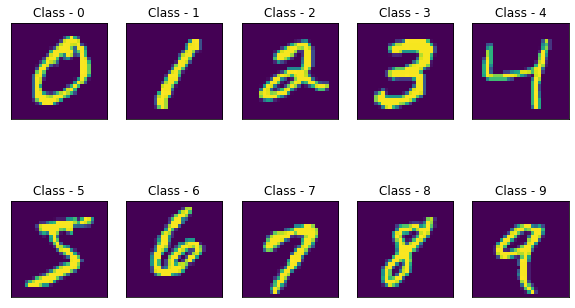

In [26]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])




# Design CNN

### import Conv2D, MaxPool2D

In [27]:
from keras.layers import Conv2D, MaxPool2D, Flatten  #2차원 계산 객체가 필요함.

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(8) 

In [28]:
# Random number seed 
np.random.seed(1234)
tf.random.set_seed(1234)

In [30]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    keras.layers.Dense(128, activation='relu'),  #첫번째뉴런 128개
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [31]:
c1f2.summary()  #320개 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               802944    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [32]:
3*3*32+32

320

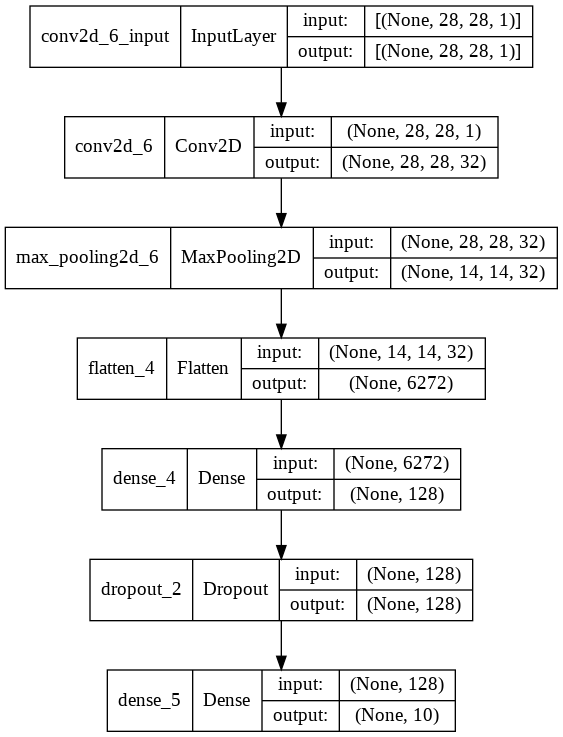

In [33]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [34]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
            validation_data = (X_test, y_test))

Epoch 1/20
600/600 [==============================] - 34s 8ms/step - loss: 0.2419 - accuracy: 0.9288 - val_loss: 0.0768 - val_accuracy: 0.9762
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0821 - accuracy: 0.9759 - val_loss: 0.0555 - val_accuracy: 0.9819
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0576 - accuracy: 0.9827 - val_loss: 0.0456 - val_accuracy: 0.9843
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0384 - val_accuracy: 0.9862
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0413 - val_accuracy: 0.9862
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0374 - val_accuracy: 0.9877
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0358 - val_accuracy: 0.9879
Epoch

In [35]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0449 - accuracy: 0.9891


[0.04486633837223053, 0.9890999794006348]

---

## **CNN1 + FCN3**

In [36]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [37]:
c1f3 = tf.keras.models.Sequential([ 
     Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [38]:
c1f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

In [39]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2415 - accuracy: 0.9269
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0748 - accuracy: 0.9771
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0518 - accuracy: 0.9840
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0365 - accuracy: 0.9890
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0291 - accuracy: 0.9910
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0206 - accuracy: 0.9930
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0161 - accuracy: 0.9950
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0122 - accuracy: 0.9960

In [40]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0519 - accuracy: 0.9885


[0.05192578583955765, 0.9884999990463257]

## **CNN2 + FCN2**

In [69]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [70]:
c2f2 = tf.keras.models.Sequential([ 
 Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
 MaxPool2D(pool_size=(2,2), strides=(2,2)),            
 Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),            
 MaxPool2D(pool_size=(2,2), strides=(2,2)), 
 Flatten(),

tf.keras.layers.Dense(128, activation='relu'),  
tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(10, activation='softmax')
])

fcn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [71]:
c2f2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1568)              0         
                                                                 
 dense_19 (Dense)            (None, 128)              

In [75]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100)

RuntimeError: ignored

In [74]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

RuntimeError: ignored

## **CNN2 + FCN3**

In [52]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [51]:
c2f3 = tf.keras.models.Sequential([ 
   Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
      Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 

    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [53]:
c2f3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1568)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [54]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.3005 - accuracy: 0.9056
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0886 - accuracy: 0.9743
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0620 - accuracy: 0.9823
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0495 - accuracy: 0.9858
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0408 - accuracy: 0.9877
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0351 - accuracy: 0.9898
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0314 - accuracy: 0.9908
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0259 - accuracy: 0.9920
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0242 - accuracy: 0.9929
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0205 - accuracy: 0.9933

In [55]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0297 - accuracy: 0.9930


[0.02974880114197731, 0.9929999709129333]

In [56]:
c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0519 - accuracy: 0.9885


[0.05192578583955765, 0.9884999990463257]

# **[DIY] Hidden layer에 따른 정확도**

In [57]:
c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0519 - accuracy: 0.9885


[0.05192578583955765, 0.9884999990463257]

In [58]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0449 - accuracy: 0.9891


[0.04486633837223053, 0.9890999794006348]

In [60]:
# Try another method!!
cnn_result = [[0.08733399957418442, 0.9789999723434448], 
 [0.07378004491329193, 0.9837999939918518], 
 [0.06836291402578354, 0.984000027179718], 
 [0.08842429518699646, 0.9807000160217285]]

In [62]:
# select accuracies
accuracy = [row[1] for row in cnn_result]
accuracy

[0.9789999723434448, 0.9837999939918518, 0.984000027179718, 0.9807000160217285]

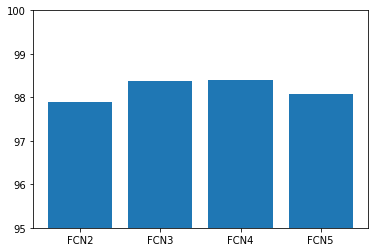

In [66]:
x = np.arange(4)
cnns = ['FCN2','FCN3','FCN4','FCN5']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((95,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [77]:
c2f2.save('c2f2_best.hdf5')

In [76]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

RuntimeError: ignored

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [78]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))

RuntimeError: ignored

In [ ]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [ ]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

In [ ]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [ ]:
# Code here!
학습 개체에 담아서 뭐라뭐라